##  Logistic Regression

### Loading of Data

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 

In [41]:
df=pd.read_csv("admission.txt",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [42]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [43]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plotting of Data

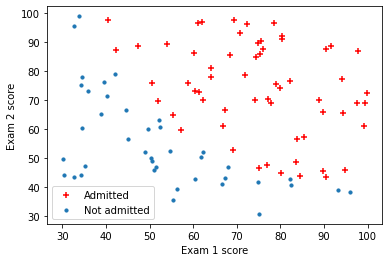

In [44]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

Implement, in the following, the Sigmoid function.

In [45]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

Now you can test the sigmoid function using the following code. The expected value is 0.5

In [46]:
# testing the sigmoid function
sigmoid(0)

0.5

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

Based on the above formulas seen in class, implement the cost function of the logistic regression model. 


In [47]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
   ####### Write your Code Here ######
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
   ###################################
    
    return cost[0], grad

### Feature scaling

In [48]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

You can test now the cost function using the following code. If your implementation is correct the expected outcome should be as follows: 

Cost of initial theta is 0.693147180559946

Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]

In [49]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

If you have done the exercises of lab2, you can take the code of the gradient descent that you have implemented and put it here. Otherwise it is a good exercised to do it now. 



In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
   ####### Write Your Code Here ####### 

   ####################################
    
    return theta , J_history

In [ ]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [ ]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

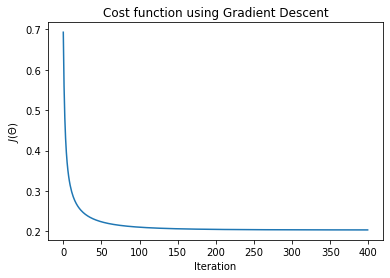

In [ ]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

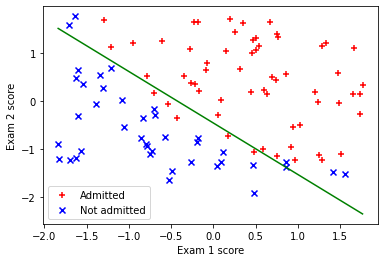

In [ ]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

Write the code of the function that has as input X and the learned theta parameters and returns the predictions. 

In [ ]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
   ####### Write Your Code Here ####### 

   ####################################
    
    return predictions>0

Now test the predictve model using the unlabeled data [45,85] . If your code is implemented correctly the admission should be of 0.7677628875792489

In [ ]:
x_test = np.array([45,85])

####### Write Your Code Here ####### 

####################################
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

### Accuracy on the training set 

Test the accuracy on the training data, the obratined result should be :

Train Accuracy: 89 %


In [ ]:
p=classifierPredict(theta,X)

########## Write Your Code Here ##########
##########################################



## Regularized Logistic Regression


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/acceptance.txt", header=None)
df.head()

In [ ]:
df.describe()

In [8]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Plotting of the data

In [ ]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

### Feature Mapping

with k variables and degrees of n, the number of polynomial terms:

$ {k+ n \choose n}$

In [9]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [10]:
X = mapFeature(X[:,0], X[:,1],6)

### Computing Regularize Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

In [ ]:
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    ########### Write Your Code Here ########
    #########################################

    return cost[0], grad

You can now test the cost function by running the following code. The result should be:

Cost at initial theta (zeros): 0.6931471805599461

In [ ]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)

In [ ]:
print("Cost at initial theta (zeros):",cost)

In [12]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

Run the following code to test the gradient descent

In [ ]:
theta , J_history = gradientDescent(X,y,initial_theta,1,800,0.2)

In [ ]:
print("The regularized theta using ridge regression:\n",theta)

### Plotting of Cost function


In [ ]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plot Decision Boundary

In [ ]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

In [ ]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Accuracy of model

Run the following code to test the accuracy of the model on the training data. If the implementation is right, the expected outcome should be:

Train Accuracy: 83.05084745762711 %

In [ ]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [ ]:
p=classifierPredict(theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

### Lasso Regression

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n |\Theta_j|$

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l1")
clf.fit(X,y)

In [ ]:
thetaLasso=clf.coef_

In [ ]:
print("The regularized theta using lasso regression:\n",thetaLasso.reshape(28,1))